In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [14]:
df=pd.read_csv(r'../dataset/Cellphone.csv') 

In [15]:
df

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [16]:
df.drop(['Product_id','weight','Sale','thickness','cpu freq','ppi'],inplace=True,axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         161 non-null    int64  
 1   resoloution   161 non-null    float64
 2   cpu core      161 non-null    int64  
 3   internal mem  161 non-null    float64
 4   ram           161 non-null    float64
 5   RearCam       161 non-null    float64
 6   Front_Cam     161 non-null    float64
 7   battery       161 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 10.2 KB


C:\Users\mahmod\AppData\Local\Temp\ipykernel_2376\4064560391.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


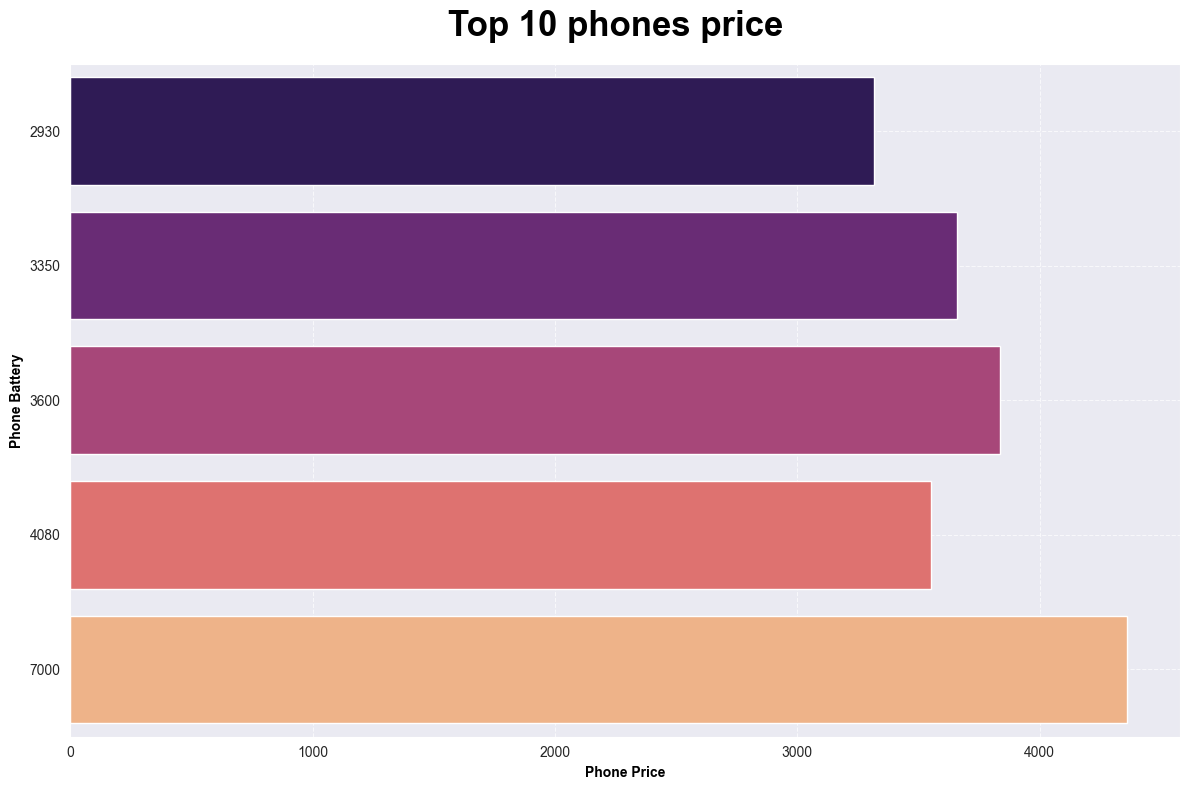

In [18]:
top_rated = df.nlargest(10, 'Price').sort_values('Price', ascending=True)

sns.set_style("darkgrid")

plt.figure(figsize=(12, 8))
sns.barplot(
    x="Price",
    y="battery",
    data=top_rated,
    palette="magma",  
    orient="h"
)


plt.title("Top 10 phones price  ", fontsize=25, fontweight='bold', pad=20, color='black')
plt.xlabel("Phone Price", fontsize=10, fontweight='bold', color='black')
plt.ylabel("Phone Battery", fontsize=10, fontweight='bold', color='black')

plt.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()

plt.show()

C:\Users\mahmod\AppData\Local\Temp\ipykernel_2376\1404457709.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


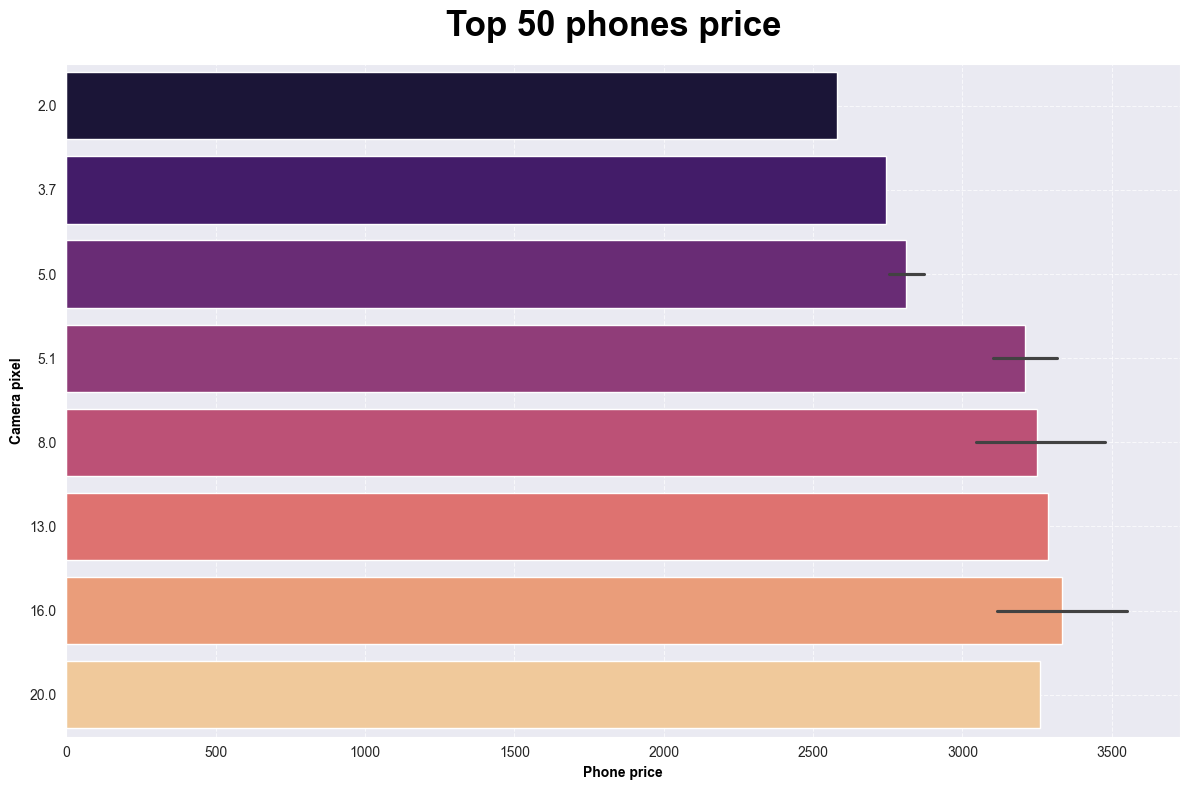

In [19]:
top_rated = df.nlargest(50, 'Price').sort_values('Price', ascending=True)

sns.set_style("darkgrid")

plt.figure(figsize=(12, 8))
sns.barplot(
    x="Price",
    y="Front_Cam",
    data=top_rated,
    palette="magma",  
    orient="h"
)

plt.title("Top 50 phones price  ", fontsize=25, fontweight='bold', pad=20, color='black')
plt.xlabel("Phone price", fontsize=10, fontweight='bold', color='black')
plt.ylabel("Camera pixel", fontsize=10, fontweight='bold', color='black')

plt.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()

plt.show()

In [20]:
price = df['Price']
df.drop(columns=['Price'], axis=1, inplace=True)
df['Price'] = price
 


In [21]:
df

,resoloution,cpu core,internal mem,ram,RearCam,Front_Cam,battery,Price
0,5.20,8,16.0,3.000,13.00,8.0,2610,2357
1,4.00,2,4.0,1.000,3.15,0.0,1700,1749
2,4.70,4,8.0,1.500,13.00,5.0,2000,1916
3,4.00,2,4.0,0.512,3.15,0.0,1400,1315
4,4.00,2,4.0,1.000,3.15,0.0,1700,1749
...,...,...,...,...,...,...,...,...
156,5.46,4,128.0,6.000,12.00,16.0,4080,3551
157,5.50,4,128.0,6.000,20.00,8.0,3400,3211
158,5.50,8,64.0,4.000,20.00,20.0,3000,3260
159,5.50,4,128.0,6.000,20.00,8.0,3400,3211


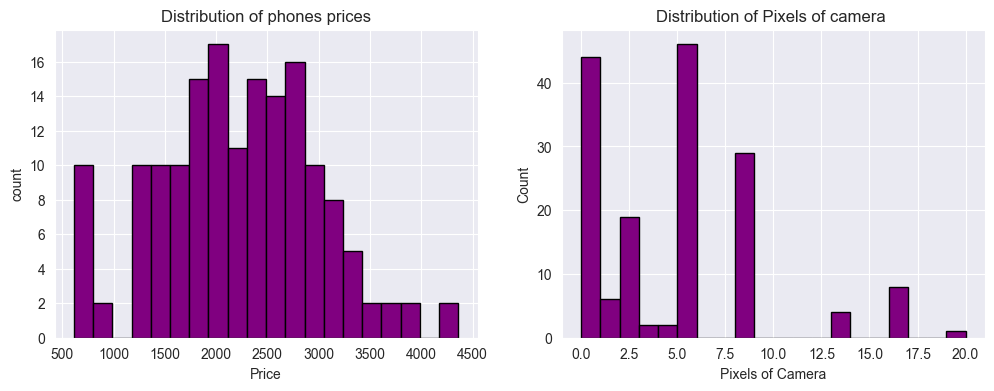

In [22]:
fig , axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(df['Price'], bins=20, edgecolor='black', color='purple')

axes[0].set_title('Distribution of phones prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('count')
axes[1].hist(df['Front_Cam'], bins=20, edgecolor='black', color='purple')
axes[1].set_title('Distribution of Pixels of camera ')
axes[1].set_xlabel('Pixels of Camera')
axes[1].set_ylabel('Count')
plt.show()


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   resoloution   161 non-null    float64
 1   cpu core      161 non-null    int64  
 2   internal mem  161 non-null    float64
 3   ram           161 non-null    float64
 4   RearCam       161 non-null    float64
 5   Front_Cam     161 non-null    float64
 6   battery       161 non-null    int64  
 7   Price         161 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 10.2 KB


<Axes: >

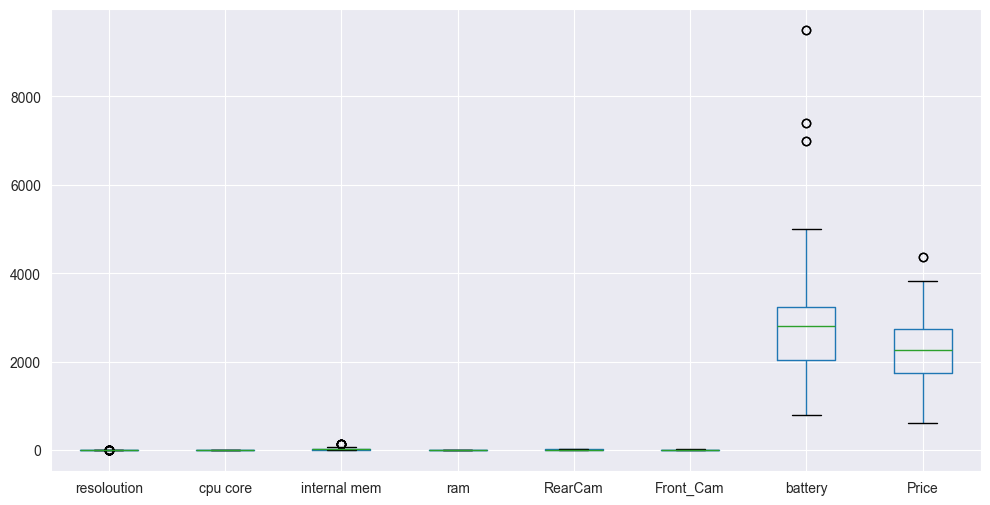

In [24]:
df.boxplot(figsize=(12,6))

In [25]:
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_indices = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].index
    return outlier_indices
outlier_indices = outliers(df, 'battery')

outlier_indices = pd.DataFrame(outlier_indices)
outlier_indices



,0
0,37
1,40
2,127
3,128
4,152
5,153


In [26]:
df.drop(outlier_indices)

,resoloution,cpu core,internal mem,ram,RearCam,Front_Cam,battery,Price
1,4.00,2,4.0,1.000,3.15,0.0,1700,1749
2,4.70,4,8.0,1.500,13.00,5.0,2000,1916
3,4.00,2,4.0,0.512,3.15,0.0,1400,1315
4,4.00,2,4.0,1.000,3.15,0.0,1700,1749
5,5.50,4,16.0,2.000,16.00,8.0,2500,2137
...,...,...,...,...,...,...,...,...
156,5.46,4,128.0,6.000,12.00,16.0,4080,3551
157,5.50,4,128.0,6.000,20.00,8.0,3400,3211
158,5.50,8,64.0,4.000,20.00,20.0,3000,3260
159,5.50,4,128.0,6.000,20.00,8.0,3400,3211


In [27]:
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_indices = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].index
    return outlier_indices
outlier_indices = outliers(df, 'internal mem')

outlier_indices = pd.DataFrame(outlier_indices)
outlier_indices



,0
0,83
1,87
2,152
3,153
4,155
5,156
6,157
7,159


In [28]:
df.drop(outlier_indices)

,resoloution,cpu core,internal mem,ram,RearCam,Front_Cam,battery,Price
1,4.00,2,4.0,1.000,3.15,0.0,1700,1749
2,4.70,4,8.0,1.500,13.00,5.0,2000,1916
3,4.00,2,4.0,0.512,3.15,0.0,1400,1315
4,4.00,2,4.0,1.000,3.15,0.0,1700,1749
5,5.50,4,16.0,2.000,16.00,8.0,2500,2137
...,...,...,...,...,...,...,...,...
156,5.46,4,128.0,6.000,12.00,16.0,4080,3551
157,5.50,4,128.0,6.000,20.00,8.0,3400,3211
158,5.50,8,64.0,4.000,20.00,20.0,3000,3260
159,5.50,4,128.0,6.000,20.00,8.0,3400,3211


In [29]:
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_indices = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].index
    return outlier_indices
outlier_indices = outliers(df, 'Price')

outlier_indices = pd.DataFrame(outlier_indices)
outlier_indices



,0
0,152
1,153


In [30]:
df.drop(outlier_indices)

,resoloution,cpu core,internal mem,ram,RearCam,Front_Cam,battery,Price
1,4.00,2,4.0,1.000,3.15,0.0,1700,1749
2,4.70,4,8.0,1.500,13.00,5.0,2000,1916
3,4.00,2,4.0,0.512,3.15,0.0,1400,1315
4,4.00,2,4.0,1.000,3.15,0.0,1700,1749
5,5.50,4,16.0,2.000,16.00,8.0,2500,2137
...,...,...,...,...,...,...,...,...
156,5.46,4,128.0,6.000,12.00,16.0,4080,3551
157,5.50,4,128.0,6.000,20.00,8.0,3400,3211
158,5.50,8,64.0,4.000,20.00,20.0,3000,3260
159,5.50,4,128.0,6.000,20.00,8.0,3400,3211


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   resoloution   161 non-null    float64
 1   cpu core      161 non-null    int64  
 2   internal mem  161 non-null    float64
 3   ram           161 non-null    float64
 4   RearCam       161 non-null    float64
 5   Front_Cam     161 non-null    float64
 6   battery       161 non-null    int64  
 7   Price         161 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 10.2 KB


In [32]:
scal = StandardScaler()
X = df.drop('Price', axis=1) 
y = df['Price'] 
numCols = ['internal mem' ,'battery']
X[numCols] = scal.fit_transform(X[numCols])



In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)



RandomForestRegressor()

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = rf.predict(X_test)
# Evaluate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 15643.464536757581
Mean Absolute Error: 101.90530303030303
R-squared: 0.9724047146786464


In [35]:
import joblib
joblib.dump(scal, "scaler.pkl")
joblib.dump(rf, "rf_model.pkl")


['rf_model.pkl']